In [116]:
# install and load necessary packages for data manipulation and visualization
library("viridis") # install the viridis color scale package
library(tidyverse)
library(dplyr)
library(janitor)
library(ggplot2)
library(lubridate)
library(tidyr)

In [117]:
# load the dataset from CSV files into R as data frames
Activity_data <- read_csv("/kaggle/input/bellabeat-data/dailyActivity_merged.csv")
Sleep_data <- read_csv("/kaggle/input/bellabeat-data/sleepDay_merged.csv")
Steps_data <- read_csv("/kaggle/input/bellabeat-data/hourlySteps_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

In [118]:
# clean column names to ensure they are consistent and easy to work with
Activity_data_v1 <- clean_names(Activity_data)
Sleep_data_v1 <- clean_names(Sleep_data)
Steps_data_v1 <- clean_names(Steps_data)

In [119]:
# convert date columns to proper Date format for easier analysis
Activity_data_v1$activity_date <- as.Date(Activity_data_v1$activity_date, format="%m/%d/%Y")
Sleep_data_v1$sleep_day <- as.Date(Sleep_data_v1$sleep_day, format="%m/%d/%Y")
Steps_data_v1$activity_hour <- as.Date(Steps_data_v1$activity_hour, format="%m/%d/%Y")

In [171]:
# check the number of distinct IDs in each dataset to understand the dataset size and scope
n_distinct(Activity_data_v1$id)
n_distinct(Sleep_data_v1$id)
n_distinct(Steps_data_v1$id)

[1] 33

[1] 24

[1] 33

In [121]:
# provide summary statistics for key columns in the Activity data to get an overview of the data
summary(Activity_data_v1 %>%
  select(total_steps, total_distance, calories, sedentary_minutes, very_active_minutes, lightly_active_minutes, moderately_active_distance))

# provide summary statistics for key columns in the Sleep data to get an overview of the data
summary(Sleep_data_v1 %>% select(total_sleep_records, total_minutes_asleep, total_time_in_bed))

  total_steps    total_distance      calories    sedentary_minutes
 Min.   :    0   Min.   : 0.000   Min.   :   0   Min.   :   0.0   
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828   1st Qu.: 729.8   
 Median : 7406   Median : 5.245   Median :2134   Median :1057.5   
 Mean   : 7638   Mean   : 5.490   Mean   :2304   Mean   : 991.2   
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793   3rd Qu.:1229.5   
 Max.   :36019   Max.   :28.030   Max.   :4900   Max.   :1440.0   
 very_active_minutes lightly_active_minutes moderately_active_distance
 Min.   :  0.00      Min.   :  0.0          Min.   :0.0000            
 1st Qu.:  0.00      1st Qu.:127.0          1st Qu.:0.0000            
 Median :  4.00      Median :199.0          Median :0.2400            
 Mean   : 21.16      Mean   :192.8          Mean   :0.5675            
 3rd Qu.: 32.00      3rd Qu.:264.0          3rd Qu.:0.8000            
 Max.   :210.00      Max.   :518.0          Max.   :6.4800            

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.000       Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.000       1st Qu.:361.0        1st Qu.:403.0    
 Median :1.000       Median :433.0        Median :463.0    
 Mean   :1.119       Mean   :419.5        Mean   :458.6    
 3rd Qu.:1.000       3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.000       Max.   :796.0        Max.   :961.0    

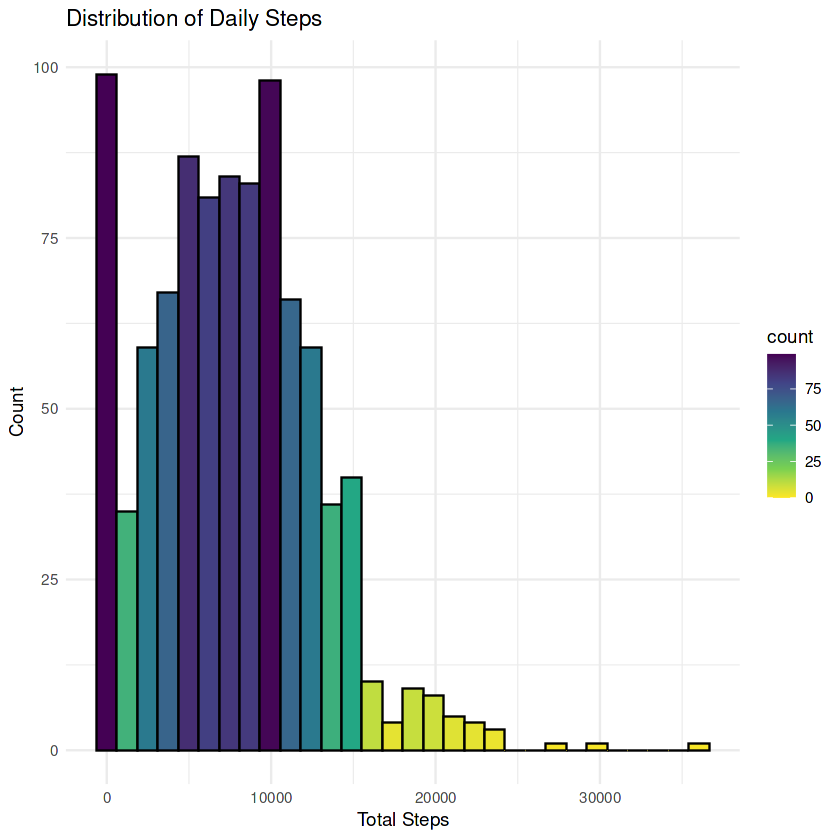

In [122]:
# visualize the distribution of daily steps using a histogram with the viridis color scale
ggplot(Activity_data_v1, aes(x = total_steps)) +
  geom_histogram(aes(fill = after_stat(count)), bins = 30, color = "black") +
  scale_fill_viridis_c(option = "viridis", direction = -1) +
  labs(title = "Distribution of Daily Steps", x = "Total Steps", y = "Count") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


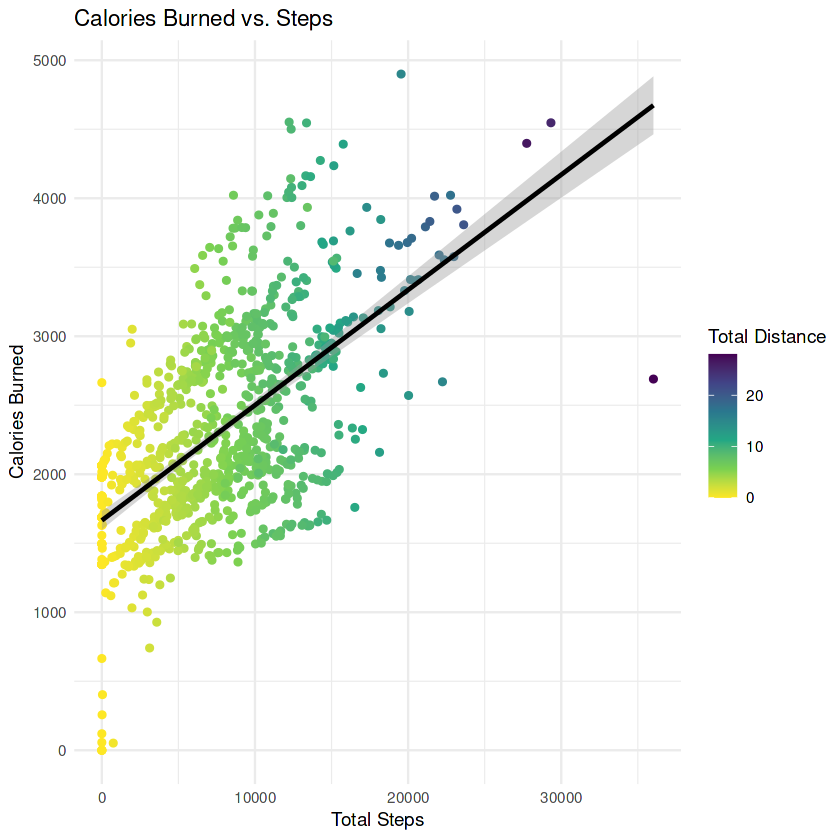

In [123]:
# create a scatter plot of calories burned vs. steps taken, colored by total distance
ggplot(Activity_data_v1, aes(x = total_steps, y = calories, color = total_distance)) +
  geom_point() +
  scale_color_viridis_c(option = "viridis", direction = -1) +
  geom_smooth(method = "lm", color = "black") +
  labs(title = "Calories Burned vs. Steps", x = "Total Steps", y = "Calories Burned", color = "Total Distance") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


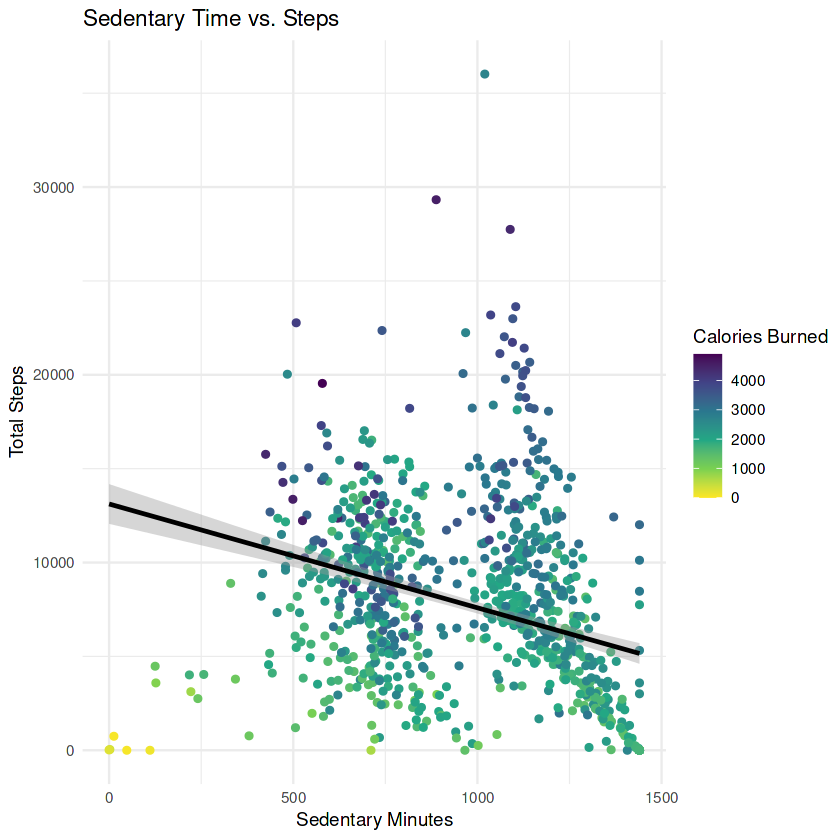

In [124]:
# create a scatter plot of sedentary minutes vs. steps taken, colored by calories burned
ggplot(Activity_data_v1, aes(x = sedentary_minutes, y = total_steps, color = calories)) +
  geom_point() +
  scale_color_viridis_c(option = "viridis", direction = -1) +
  geom_smooth(method = "lm", color = "black") +
  labs(title = "Sedentary Time vs. Steps", x = "Sedentary Minutes", y = "Total Steps", color = "Calories Burned") +
  theme_minimal()

In [153]:
# create a new column 'week_day' that contains the day of the week
Activity_data_v1$week_day <- weekdays(as.Date(Activity_data_v1$activity_date))

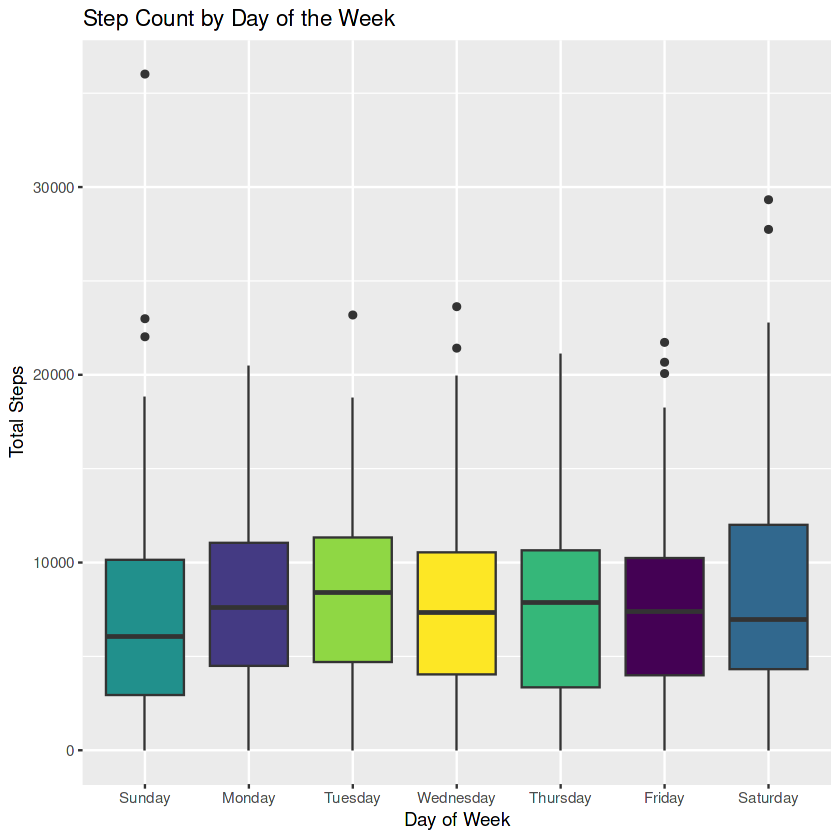

In [161]:
# create a boxplot of total steps by day of the week with custom color fill
ggplot(Activity_data_v1, aes(x = factor(week_day, levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday")), 
                             y = total_steps)) +
  geom_boxplot(aes(group = week_day, fill = week_day)) +  # group by week_day and apply color
  scale_fill_viridis(discrete = TRUE, option = "viridis") +  # use viridis color scale for discrete variable
  labs(title = "Step Count by Day of the Week", x = "Day of Week", y = "Total Steps") +
  theme(legend.position = "none")  # remove the legend

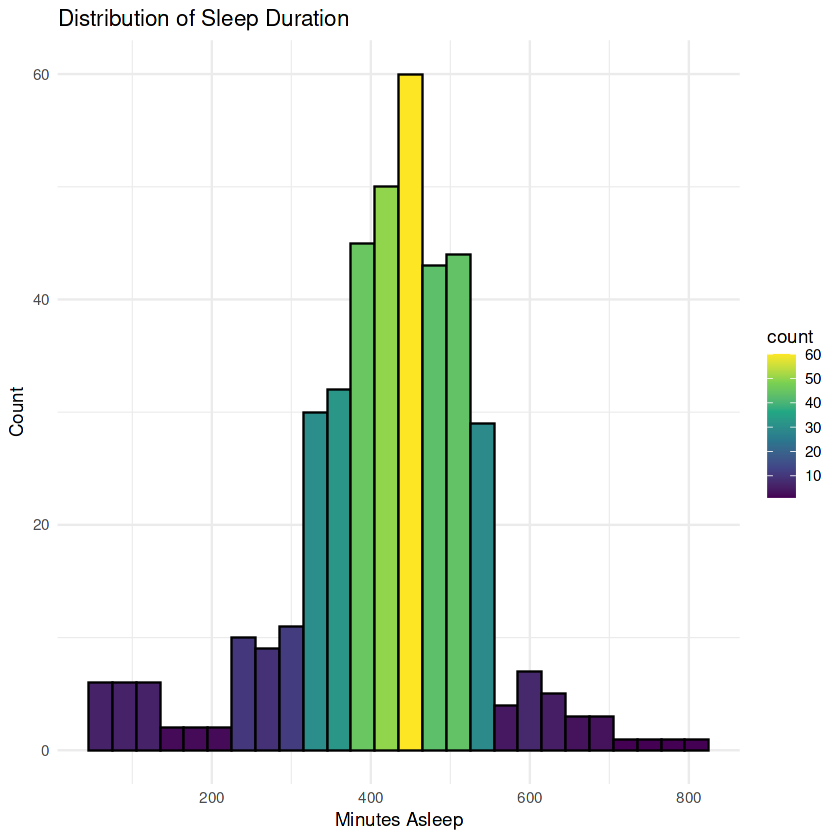

In [126]:
# create a histogram of total minutes asleep from the Sleep data, with a continuous color scale
ggplot(Sleep_data_v1, aes(x = total_minutes_asleep)) +
  geom_histogram(binwidth = 30, aes(fill = ..count..), color = "black") +  # map fill to the count of observations
  scale_fill_viridis_c(option = "viridis", direction = 1) +  # use scale_fill_viridis_c for continuous color scale
  theme_minimal() +
  labs(title = "Distribution of Sleep Duration", x = "Minutes Asleep", y = "Count")

In [127]:
# create a new column for 'activity_level' in the Activity_data_v1 dataset based on total steps:
# - low for steps less than 5,000
# - moderate for steps between 5,000 and 9,999
# - high for steps greater than or equal to 10,000
Activity_data_v1 <- Activity_data_v1 %>%
  mutate(activity_level = case_when(
    total_steps < 5000 ~ "Low",
    total_steps >= 5000 & total_steps < 10000 ~ "Moderate",
    total_steps >= 10000 ~ "High"
  ))

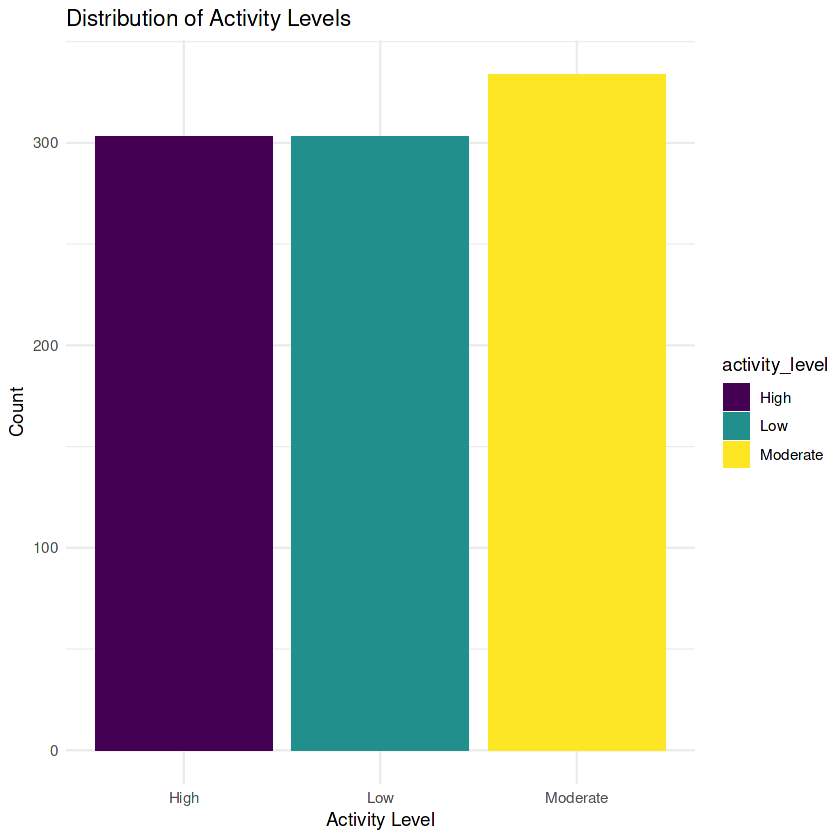

In [128]:
# plot a bar chart showing the distribution of activity levels:
# - the x-axis represents different activity levels ('low', 'moderate', 'high')
# - the fill color corresponds to the activity level using the viridis color scale
# - the count of observations for each activity level is displayed on the y-axis
ggplot(Activity_data_v1, aes(x = activity_level, fill = activity_level)) +
  geom_bar() +
  scale_fill_viridis_d(option = "viridis") +  # Apply viridis color scale for discrete variables
  labs(title = "Distribution of Activity Levels", x = "Activity Level", y = "Count") +
  theme_minimal()